#MNIST Digit Classification using CNN

### Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from  tensorflow.keras.utils import to_categorical,plot_model 
import tensorflow as tf
print("Import Done")

Import Done


### Loading the dataset

In [2]:
mnist = tf.keras.datasets.mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data() #Load data
##Lets Look at the Shape of Train and Test Dataset 
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


4


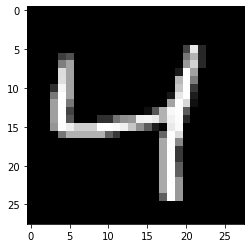

In [3]:
#Showing the Image of Number with their labels the Labels are stored in ytrain
idx=2
plt.imshow(xtrain[idx], cmap="gray") # Import the image
print(ytrain[idx])
plt.show() # Plot the image

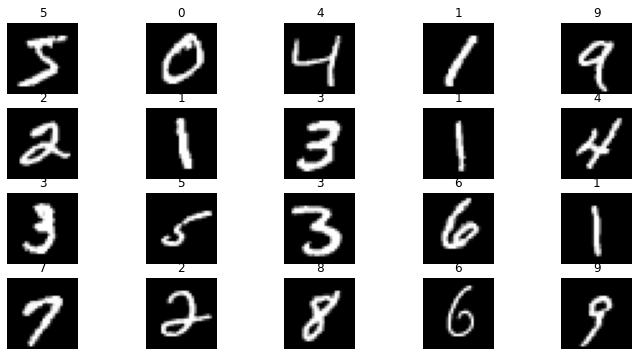

In [4]:
#Let's Look at all the image the reason 20 image is printed to 0-9 the first set does not have all the images
fig,axes= plt.subplots(nrows=4,ncols=5,figsize=(12,6))
axes=axes.flatten()
for i,ax in zip(range(20),axes):
    ax.imshow(xtrain[i],cmap='gray')
    ax.set_title(ytrain[i])
    ax.axis('off')
plt.show()

In [5]:
#Reshaping the image for CNN for gray scale image
print(xtrain.shape)
print(xtest.shape)
xtrain=xtrain.reshape(60000,28,28,1)
xtest=xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#Scaling down Data
xtrain=xtrain/255
xtest=xtest/255

Sclaing down the Image in 0-1 the max value of image is 255 so dividing it by 255
- The output for Train and Test is would be between 0 -1
- The step is not applicable for ytest or ytrain as they just contains the label

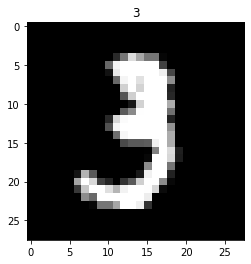

In [7]:
##Idx is just a value can be changed from any value between 0 -59999 there are total 60,000 Image 
idx=10
plt.imshow(xtrain[idx].reshape(28,28), cmap="gray") # Import the image
plt.title(ytrain[idx])  ## Put the Title of the Image . 
plt.show() # Plot the image

In [8]:
# Printing the ytest and ytrain output labels
print(ytest)
print(ytrain)

[7 2 1 ... 4 5 6]
[5 0 4 ... 5 6 8]


In [9]:
##Printing Shape before and After the One Hot Encoding
print(ytrain.shape)
print(ytest.shape)
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000,)
(10000,)
(60000, 10)
(10000, 10)


One Hot Encoding
- ytrain and ytest has the output columns or labels
- For all CNN output columns with Multiclass this step is same
- This is not as same normal one hot encoding in machine learning the encoding will Create columns equal to no of Class .
- The steps are boiler plate code and can be copied for all cnn problem with multi class.

In [10]:
#Printing the labels for first 10 columns after one hot encoding . 
ytrain[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

###Building the Fully Connected Neural Network .
- The First Layer is sequential layer
- Filter is no. of Filter using for every layer different or same filter can be used .
- Here filter size is choosen as 2*2 we can change this to higher or lower value .
- For Higher Accuracy the filter size(Kernel_size) should be lower this would increase the training time which will come at the cost of accuracy .
- Activation function is relu which will take either positive value and conver 0 to all negative value .
- Flatten layer is pre-requisite for all CNN network where the 2d array is changed to 1d  array none of values are lost in this step.
- We have added Dense layer this can vary from dataset to dataset .
- For Output layer the activation function is softmax this is multiclass classification function for binary class sigmoid is preferred choice.

In [11]:
from tensorflow.keras import models,layers
# Create Sequential Models
model=models.Sequential()
## Add the Layers for Convocalation 
model.add(layers.Conv2D(filters=10,kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

## Add Second Conventional Layer to Model
model.add(layers.Conv2D(filters=12,kernel_size=(2,2),activation='relu'))
model.add(layers.Conv2D(filters=20,kernel_size=(2,2),activation='relu'))

## Adding Max Pooling Layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

## Flattne Layer
model.add(layers.Flatten())

### Classification Segemention to the  
model.add(layers.Dense(150,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))

########Output layer for 
model.add(layers.Dense(10,activation='softmax'))

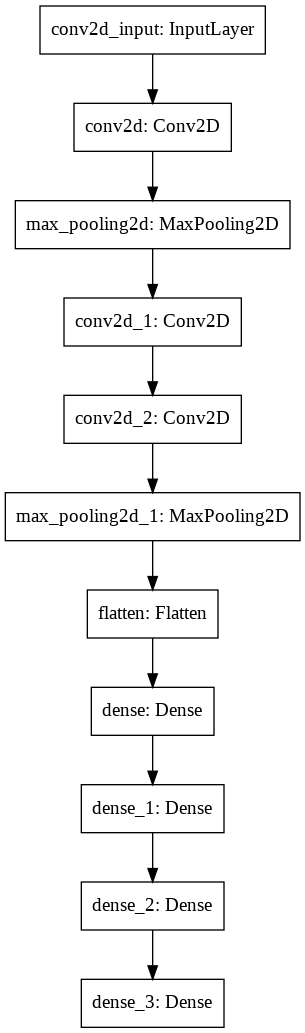

In [12]:
##Printing the Model 
plot_model(model)

In [13]:
#Model Compilation

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 10)        50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 12)        492       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 20)        980       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 500)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               7

###Model Compliation .
- Optimizer is Adam, update network weights iterative based in training data
- Categorical crossentropy is a loss function that is used in multi-class classification tasks
- Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right

### Train the model

In [14]:
#Here we are fitting 
history=model.fit(xtrain, ytrain, epochs=20,batch_size=1000,verbose=True,validation_data=(xtest, ytest))

Epoch 1/20
60/60 [==============================] - 1s 22ms/step - loss: 1.1141 - accuracy: 0.6742 - val_loss: 0.3464 - val_accuracy: 0.8980
Epoch 2/20
60/60 [==============================] - 1s 18ms/step - loss: 0.2481 - accuracy: 0.9282 - val_loss: 0.1786 - val_accuracy: 0.9463
Epoch 3/20
60/60 [==============================] - 1s 18ms/step - loss: 0.1514 - accuracy: 0.9540 - val_loss: 0.1109 - val_accuracy: 0.9670
Epoch 4/20
60/60 [==============================] - 1s 18ms/step - loss: 0.1124 - accuracy: 0.9660 - val_loss: 0.0897 - val_accuracy: 0.9710
Epoch 5/20
60/60 [==============================] - 1s 18ms/step - loss: 0.0911 - accuracy: 0.9726 - val_loss: 0.0782 - val_accuracy: 0.9769
Epoch 6/20
60/60 [==============================] - 1s 18ms/step - loss: 0.0793 - accuracy: 0.9754 - val_loss: 0.0702 - val_accuracy: 0.9776
Epoch 7/20
60/60 [==============================] - 1s 18ms/step - loss: 0.0716 - accuracy: 0.9778 - val_loss: 0.0667 - val_accuracy: 0.9787
Epoch 8/20
60

## Performance Analysis

313/313 - 1s - loss: 0.0441 - accuracy: 0.9864


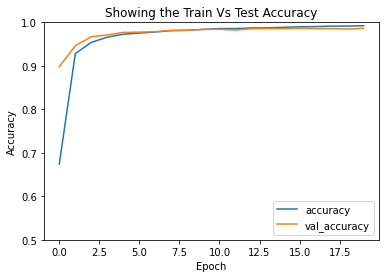

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title("Showing the Train Vs Test Accuracy")
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(xtest,  ytest, verbose=2)

##Conclusion: 98.64% Accuracy achieved